In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
import random

In [2]:
def to_states(ind):
    obs = [0, 0, 0, 0, 0]
    obs[ind] = 1
    return obs
    
def random_walk(start_state, training_size, sequence_size):
    observations = []
    
    for n in range(training_size):
        ins = []
        for i in range(sequence_size):
            obs = []
            ss = start_state
            while ss != 5 and ss != -1:
                obs.append(to_states(ss)) 
                ss += random.choice([-1, 1]) 
            ins.append(obs)
        observations.append(ins)
    
    return observations 

at alpha =  0.2 at lambda =  0.0  --> rsme =  0.09214045337123652  | weights =  [0.2752     0.40416    0.53421517 0.65572301 0.852544  ]
at alpha =  0.2 at lambda =  0.1  --> rsme =  0.08971062080515621  | weights =  [0.26392993 0.39340709 0.55076098 0.67366701 0.85560721]
at alpha =  0.2 at lambda =  0.2  --> rsme =  0.08852656594406443  | weights =  [0.25152736 0.38096592 0.56856659 0.69247164 0.85904121]
at alpha =  0.2 at lambda =  0.30000000000000004  --> rsme =  0.08878709785794847  | weights =  [0.23729905 0.36595085 0.58765732 0.71247843 0.86276989]
at alpha =  0.2 at lambda =  0.4  --> rsme =  0.09092275275293923  | weights =  [0.2203211  0.34735926 0.60794267 0.73394905 0.86663553]
at alpha =  0.15 at lambda =  0.5  --> rsme =  0.09279792889016605  | weights =  [0.25006392 0.3539374  0.58673315 0.70608094 0.81482574]
at alpha =  0.15 at lambda =  0.6000000000000001  --> rsme =  0.0958113373372322  | weights =  [0.22810918 0.32546774 0.60468227 0.73064853 0.81754077]
at alpha 

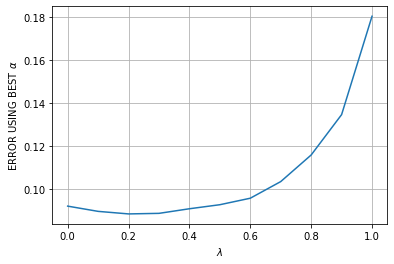

In [4]:
def run_exp3():
    # params is lamda and best alpha pair
    params = []
    for i in range(11):
        if i < 5:
            params.append([i*0.1, 0.2])
        elif i < 8:
            params.append([i*0.1, 0.15])
        elif i < 10:
            params.append([i*0.1, 0.10])
        else:
            params.append([i*0.1, 0.05])
    rsmes = []
    training_size = 100
    sequence_size = 10
    start_state = 2 
    
    rw = random_walk(start_state, training_size, sequence_size)

    for i in params:
        weights, rsme, se = get_predictions(i[0], rw, training_size, sequence_size, i[1])
        rsmes.append(rsme)

        print('at alpha = ', i[1], 'at lambda = ', i[0], ' --> rsme = ', rsme, ' | weights = ', weights)

    # plot different lambdas
    lams = [i[0] for i in params]
    plt.plot(lams, rsmes)
    plt.xlabel(r'$\lambda$') 
    plt.ylabel(r'ERROR USING BEST $\alpha$')
#     plt.title('Random Walk - Reproducing Figure 5')
    plt.grid(True)
    plt.show()

def get_predictions(lam, rw, training_size, sequence_size, alpha):
    # perform experiment on random walk to replicate figure 4 results
    rsme_list = []
    for i in range(training_size):
        weights = [0.5, 0.5, 0.5, 0.5, 0.5]
        observations = rw[i] 
        for j in range(sequence_size):
            obs = observations[j]
            delta_w = 0
            for t in range(1, len(obs) + 1):
                ind = t - 1
                p_t = np.dot(weights, obs[ind])
                p_tn1 = get_p_tn1(obs, ind, weights)
                discount_delta_w = 0
                for k in range(1, t + 1):
                    temp = np.multiply(lam ** (t - k), obs[k - 1])
                    discount_delta_w = np.add(temp, discount_delta_w)
                dw = np.multiply(alpha * (p_tn1 - p_t), discount_delta_w)
                delta_w += dw
            weights += delta_w
        err = compute_error(weights)
        rsme_list.append(err)
    stdev = np.std(rsme_list, ddof=1)
    se = stdev / math.sqrt(len(rsme_list))
    return weights, np.mean(rsme_list), se

def compute_error(weights):
    expected = np.array([1.0/6, 1.0/3, 1.0/2, 2.0/3, 5.0/6])
    rsme = math.sqrt(np.mean(np.power(np.subtract(weights, expected), 2)))
    return rsme

def get_p_tn1(obs, ind, weights):
    if ind == len(obs) - 1:
        # at last observation of sequence
        if obs[ind] == [0,0,0,0,1]:
            return 1
        elif obs[ind] == [1,0,0,0,0]:
            return 0
    else:
        # not last observation of sequence
        return np.dot(weights, obs[ind + 1])

if __name__ == '__main__':
    run_exp3()